In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from process_images import *
from numpy_to_pandas import numpy_to_pandas_dataset
from utils import *

In [3]:
%load_ext autoreload
%autoreload 2

# Parte 1

In [4]:
data = np.load("processed_dataset.npz")
df = numpy_to_pandas_dataset("processed_dataset.npz")
df.columns

Index(['pixel_00000', 'pixel_00001', 'pixel_00002', 'pixel_00003',
       'pixel_00004', 'pixel_00005', 'pixel_00006', 'pixel_00007',
       'pixel_00008', 'pixel_00009',
       ...
       'pixel_04087', 'pixel_04088', 'pixel_04089', 'pixel_04090',
       'pixel_04091', 'pixel_04092', 'pixel_04093', 'pixel_04094',
       'pixel_04095', 'label'],
      dtype='object', length=4097)

Ahora tenemos en df un DataFrame con las siguientes columnas:
- pixel_00000 - pixel_16383: 16384 (128x128) columnas, una para cada pixel, con un valor 0-255 de la escala de grises
- label: 0 si es Healthy, 1 si es Parkinson

## Ejercicio 2

In [5]:
# Dividimos el dataset en datos de entrenamiento y datos de test (80/20)

# Separar features (píxeles) y target (label)
X = df.drop('label', axis=1).values  # Convertir a numpy array
y = df['label'].values               # Convertir a numpy array

# Configuración del split
test_size = 0.2
random_state = 42
np.random.seed(random_state)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = len(X)
n_test = int(n_samples * test_size)
indices = np.random.permutation(n_samples)

# Dividir índices
test_indices = indices[:n_test]
train_indices = indices[n_test:]

# Crear splits
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(f"Dataset completo: {len(X)} muestras")
print(f"Train set: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribución de clases en train:")
print(f"  - Healthy (0): {np.sum(y_train == 0)}")
print(f"  - Parkinson (1): {np.sum(y_train == 1)}")
print(f"\nDistribución de clases en test:")
print(f"  - Healthy (0): {np.sum(y_test == 0)}")
print(f"  - Parkinson (1): {np.sum(y_test == 1)}")

Dataset completo: 1632 muestras
Train set: 1306 muestras (80.0%)
Test set: 326 muestras (20.0%)

Distribución de clases en train:
  - Healthy (0): 637
  - Parkinson (1): 669

Distribución de clases en test:
  - Healthy (0): 179
  - Parkinson (1): 147


Dividimos el conjunto de datos en un set de entrenamiento (80%) y uno de testeo (20%) para poder ajustar y luego evaluar nuestro modelo de forma controlada, asegurando que pueda generalizar a nuevas imágenes. Separamos explícitamente las features (píxeles) y las etiquetas (Parkinson o sano), y usamos una semilla fija para garantizar reproducibilidad en la selección aleatoria. Además, nos aseguramos de mantener la distribución balanceada de clases en ambos conjuntos, ya que un desequilibrio podría sesgar el aprendizaje. Esta preparación es fundamental para luego aplicar correctamente el método de descenso por gradiente y optimizar los parámetros del modelo solo con datos de entrenamiento, evitando sobreajuste y permitiendo una evaluación justa en el set de test.
La función de descenso por gradiente compara las predicciones del modelo con las etiquetas reales para medir el error y, en base a eso, ajusta sus cálculos. Lo hace dando pasos controlados en la dirección contraria al gardiente, buscando acercarse a un punto óptimo donde el modelo cometa la menor cantidad posible de errores. La magnitud de cada paso está determinada por un parámetro llamado alpha (tasa de aprendizaje), que define qué tan rápido o lento se mueve el modelo hacia la solución óptima. De esta forma, se logra mejorar la capacidad de clasificar correctamente las imágenes de personas con y sin Parkinson.

## Ejercicio 3

Iteración 0: Train MSE=0.3258, Acc=0.4877 | Test MSE=0.2956, Acc=0.5491
Iteración 100: Train MSE=0.2518, Acc=0.4816 | Test MSE=0.2530, Acc=0.4908
Iteración 200: Train MSE=0.2512, Acc=0.4931 | Test MSE=0.2525, Acc=0.4908
Iteración 300: Train MSE=0.2505, Acc=0.4946 | Test MSE=0.2521, Acc=0.4939
Iteración 400: Train MSE=0.2499, Acc=0.5061 | Test MSE=0.2516, Acc=0.5000
Iteración 500: Train MSE=0.2492, Acc=0.5123 | Test MSE=0.2511, Acc=0.5031
Iteración 600: Train MSE=0.2486, Acc=0.5191 | Test MSE=0.2506, Acc=0.5061
Iteración 700: Train MSE=0.2480, Acc=0.5253 | Test MSE=0.2502, Acc=0.5092
Iteración 800: Train MSE=0.2474, Acc=0.5375 | Test MSE=0.2497, Acc=0.5092
Iteración 900: Train MSE=0.2468, Acc=0.5459 | Test MSE=0.2492, Acc=0.5061
Iteración 1000: Train MSE=0.2462, Acc=0.5536 | Test MSE=0.2488, Acc=0.5123
Iteración 1100: Train MSE=0.2456, Acc=0.5590 | Test MSE=0.2483, Acc=0.5184
Iteración 1200: Train MSE=0.2450, Acc=0.5636 | Test MSE=0.2479, Acc=0.5215
Iteración 1300: Train MSE=0.2444, Acc

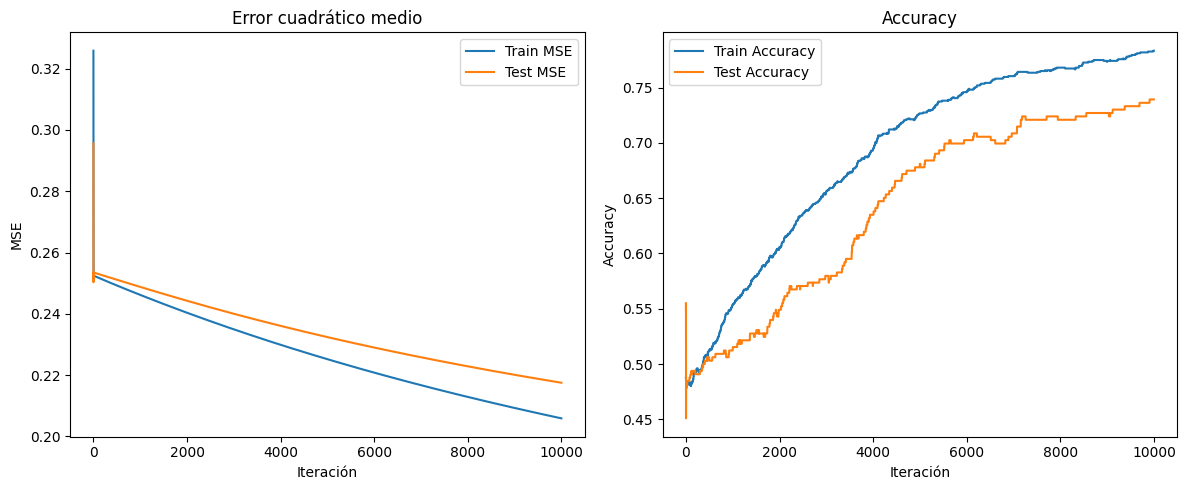

In [7]:
w_final, b_final, metrics = gradient_descent(X_train, y_train, X_test, y_test, alpha=1e-11, num_it=10000)
plot_metrics(metrics)


En nuestro caso, al usar un alpha muy pequeño (
1
×
10
−
11
1×10 
−11
 ), los gráficos muestran que el modelo va mejorando de manera muy gradual y controlada. El error cuadrático medio disminuye lentamente pero de forma constante, indicando que el modelo va reduciendo su error sin grandes oscilaciones ni saltos bruscos. Al mismo tiempo, la exactitud en el set de entrenamiento sube de manera estable y alcanza valores altos, mientras que la exactitud en test también mejora y se mantiene relativamente cercana, lo que sugiere que el modelo generaliza bien y no se sobreajusta rápidamente. Este comportamiento refleja que el alpha elegido permitió avanzar hacia un mínimo de error de forma segura y progresiva, aunque más lenta.

## Ejercicio 4


Iteración 0: Train MSE=0.4262, Acc=0.4877 | Test MSE=0.3778, Acc=0.5491
Iteración 100: Train MSE=0.2515, Acc=0.4939 | Test MSE=0.2557, Acc=0.4448
Iteración 200: Train MSE=0.2509, Acc=0.5031 | Test MSE=0.2552, Acc=0.4509
Iteración 300: Train MSE=0.2503, Acc=0.5092 | Test MSE=0.2546, Acc=0.4509
Iteración 400: Train MSE=0.2496, Acc=0.5115 | Test MSE=0.2541, Acc=0.4663
Iteración 500: Train MSE=0.2490, Acc=0.5191 | Test MSE=0.2536, Acc=0.4663
Iteración 600: Train MSE=0.2484, Acc=0.5260 | Test MSE=0.2531, Acc=0.4724
Iteración 700: Train MSE=0.2477, Acc=0.5329 | Test MSE=0.2526, Acc=0.4785
Iteración 800: Train MSE=0.2471, Acc=0.5352 | Test MSE=0.2521, Acc=0.4785
Iteración 900: Train MSE=0.2465, Acc=0.5421 | Test MSE=0.2516, Acc=0.4847
Iteración 1000: Train MSE=0.2459, Acc=0.5505 | Test MSE=0.2511, Acc=0.4847
Iteración 1100: Train MSE=0.2453, Acc=0.5574 | Test MSE=0.2506, Acc=0.4847
Iteración 1200: Train MSE=0.2447, Acc=0.5597 | Test MSE=0.2502, Acc=0.4939
Iteración 1300: Train MSE=0.2441, Acc

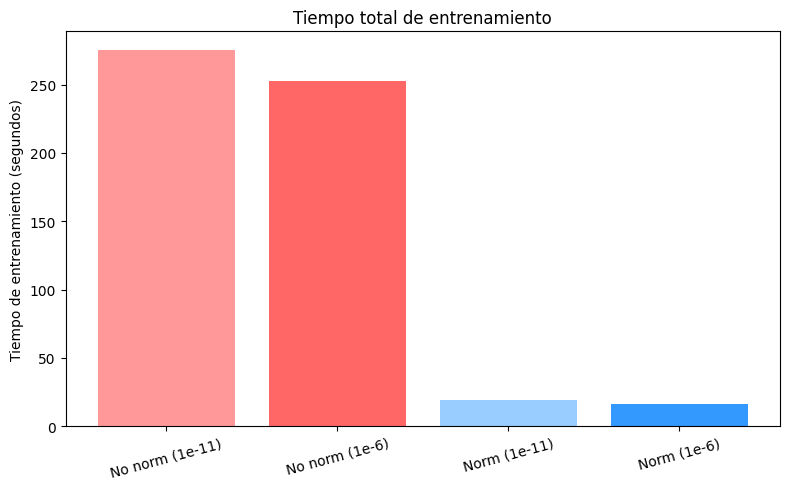

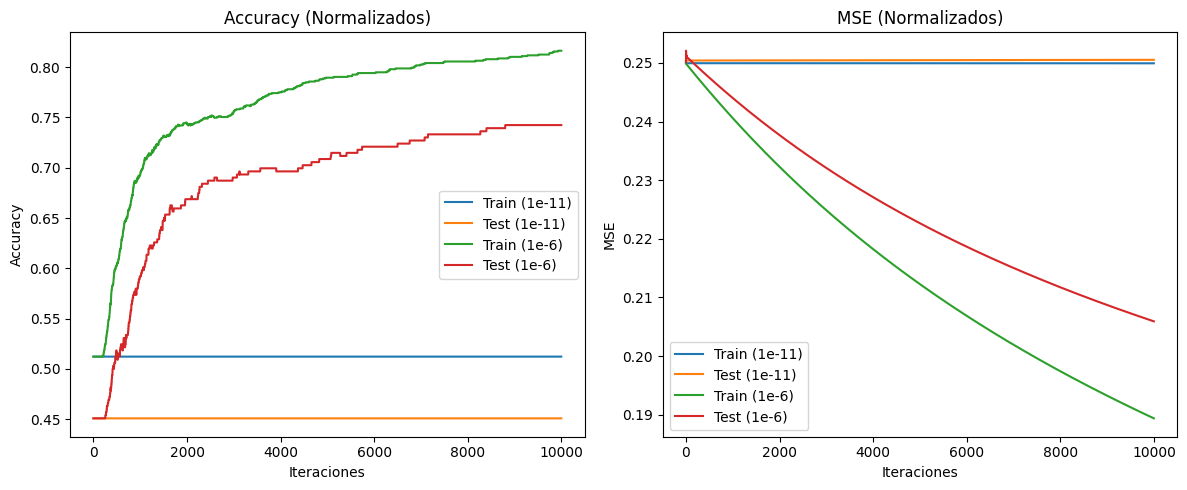

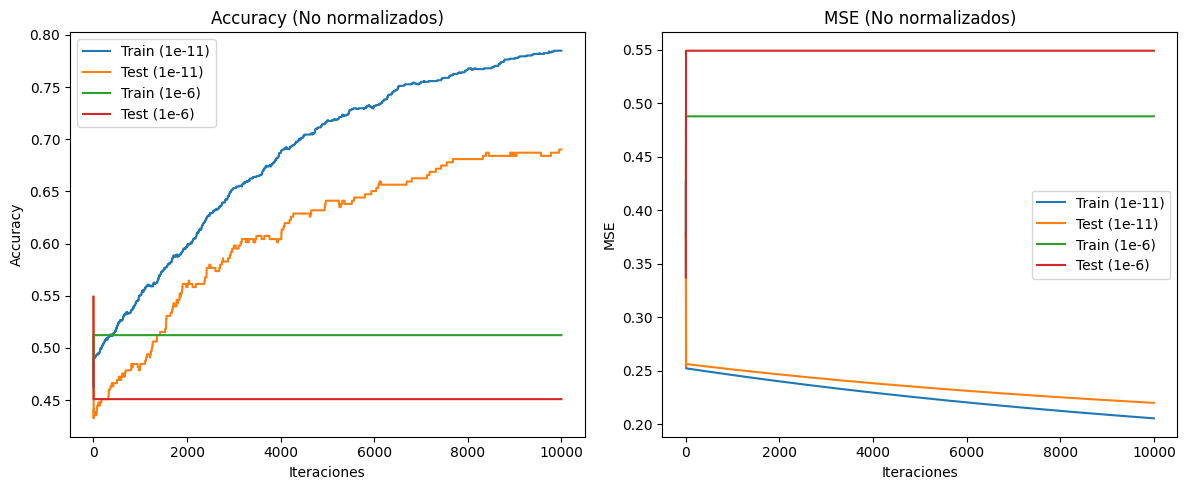

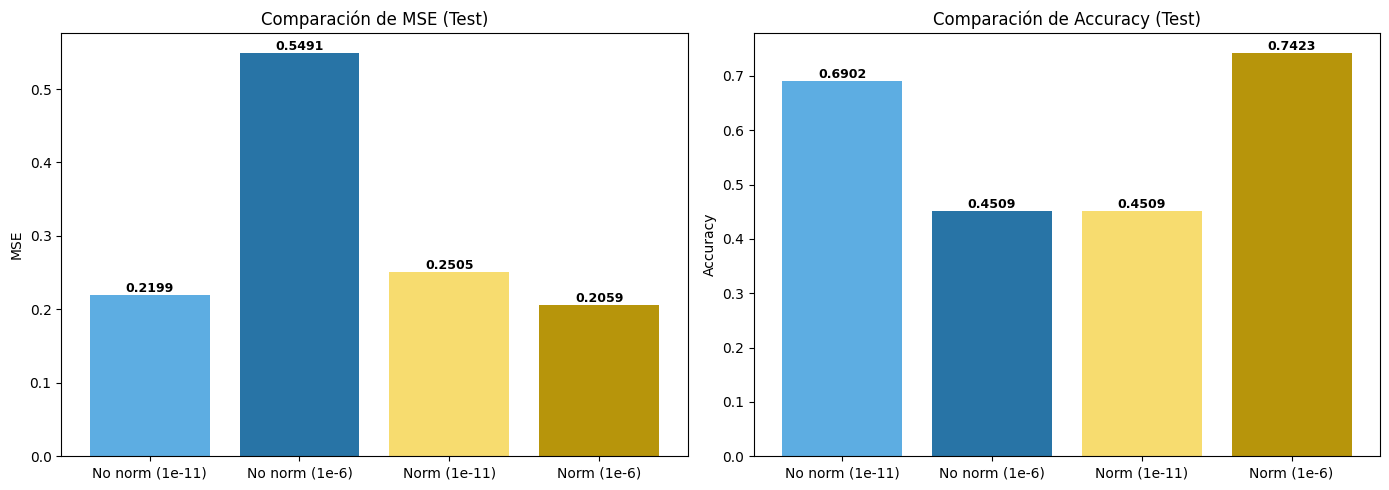

Mejora en MSE usando normalización con alpha 1e-11: -13.94%
Mejora en Accuracy usando normalización con alpha 1e-11: -34.67%


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Normalización
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Para guardar métricas y tiempos
results = {}

# ---- Caso 1: No normalizado, alpha = 1e-11 ----
start = time.time()
w1, b1, metrics1 = gradient_descent(X_train, y_train, X_test, y_test, alpha=1e-11, num_it=10000)
end = time.time()
results['no_norm_1e-11'] = {'metrics': metrics1, 'time': end - start}

# ---- Caso 2: No normalizado, alpha = 1e-6 ----
start = time.time()
w2, b2, metrics2 = gradient_descent(X_train, y_train, X_test, y_test, alpha=1e-6, num_it=10000)
end = time.time()
results['no_norm_1e-6'] = {'metrics': metrics2, 'time': end - start}

# ---- Caso 3: Normalizado, alpha = 1e-11 ----
start = time.time()
w3, b3, metrics3 = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-11, num_it=10000)
end = time.time()
results['norm_1e-11'] = {'metrics': metrics3, 'time': end - start}

# ---- Caso 4: Normalizado, alpha = 1e-6 ----
start = time.time()
w4, b4, metrics4 = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-6, num_it=10000)
end = time.time()
results['norm_1e-6'] = {'metrics': metrics4, 'time': end - start}

# ===================
# Gráfico 1: Tiempos
# ===================
plt.figure(figsize=(8, 5))
labels = ['No norm (1e-11)', 'No norm (1e-6)', 'Norm (1e-11)', 'Norm (1e-6)']
times = [results[k]['time'] for k in results]
plt.bar(labels, times, color=['#FF9999','#FF6666','#99CCFF','#3399FF'])
plt.ylabel('Tiempo de entrenamiento (segundos)')
plt.title('Tiempo total de entrenamiento')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# =============================================
# Gráfico 2: Normalizados - Accuracy y MSE
# =============================================
metrics_norm_1e11 = results['norm_1e-11']['metrics']
metrics_norm_1e6 = results['norm_1e-6']['metrics']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(metrics_norm_1e11['train_acc_list'], label='Train (1e-11)')
plt.plot(metrics_norm_1e11['test_acc_list'], label='Test (1e-11)')
plt.plot(metrics_norm_1e6['train_acc_list'], label='Train (1e-6)')
plt.plot(metrics_norm_1e6['test_acc_list'], label='Test (1e-6)')
plt.title('Accuracy (Normalizados)')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(metrics_norm_1e11['train_mse_list'], label='Train (1e-11)')
plt.plot(metrics_norm_1e11['test_mse_list'], label='Test (1e-11)')
plt.plot(metrics_norm_1e6['train_mse_list'], label='Train (1e-6)')
plt.plot(metrics_norm_1e6['test_mse_list'], label='Test (1e-6)')
plt.title('MSE (Normalizados)')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

# =============================================
# Gráfico 3: No normalizados - Accuracy y MSE
# =============================================
metrics_no_norm_1e11 = results['no_norm_1e-11']['metrics']
metrics_no_norm_1e6 = results['no_norm_1e-6']['metrics']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(metrics_no_norm_1e11['train_acc_list'], label='Train (1e-11)')
plt.plot(metrics_no_norm_1e11['test_acc_list'], label='Test (1e-11)')
plt.plot(metrics_no_norm_1e6['train_acc_list'], label='Train (1e-6)')
plt.plot(metrics_no_norm_1e6['test_acc_list'], label='Test (1e-6)')
plt.title('Accuracy (No normalizados)')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(metrics_no_norm_1e11['train_mse_list'], label='Train (1e-11)')
plt.plot(metrics_no_norm_1e11['test_mse_list'], label='Test (1e-11)')
plt.plot(metrics_no_norm_1e6['train_mse_list'], label='Train (1e-6)')
plt.plot(metrics_no_norm_1e6['test_mse_list'], label='Test (1e-6)')
plt.title('MSE (No normalizados)')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

# =====================================================
# Gráfico final: Comparación global para ambos alpha
# =====================================================
# Tomamos MSE y Accuracy finales de cada escenario
mse_vals = [
    metrics_no_norm_1e11['test_mse_list'][-1],
    metrics_no_norm_1e6['test_mse_list'][-1],
    metrics_norm_1e11['test_mse_list'][-1],
    metrics_norm_1e6['test_mse_list'][-1]
]

acc_vals = [
    metrics_no_norm_1e11['test_acc_list'][-1],
    metrics_no_norm_1e6['test_acc_list'][-1],
    metrics_norm_1e11['test_acc_list'][-1],
    metrics_norm_1e6['test_acc_list'][-1]
]

categories = [
    'No norm (1e-11)',
    'No norm (1e-6)',
    'Norm (1e-11)',
    'Norm (1e-6)'
]
colors = ['#5DADE2', '#2874A6', '#F7DC6F', '#B7950B']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# MSE
ax1.bar(categories, mse_vals, color=colors)
ax1.set_ylabel('MSE')
ax1.set_title('Comparación de MSE (Test)')
for i, v in enumerate(mse_vals):
    ax1.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Accuracy
ax2.bar(categories, acc_vals, color=colors)
ax2.set_ylabel('Accuracy')
ax2.set_title('Comparación de Accuracy (Test)')
for i, v in enumerate(acc_vals):
    ax2.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Calculamos mejoras entre pares si querés
improvement_mse_norm = ((mse_vals[0] - mse_vals[2]) / mse_vals[0]) * 100
improvement_acc_norm = ((acc_vals[2] - acc_vals[0]) / acc_vals[0]) * 100

print(f"Mejora en MSE usando normalización con alpha 1e-11: {improvement_mse_norm:.2f}%")
print(f"Mejora en Accuracy usando normalización con alpha 1e-11: {improvement_acc_norm:.2f}%")



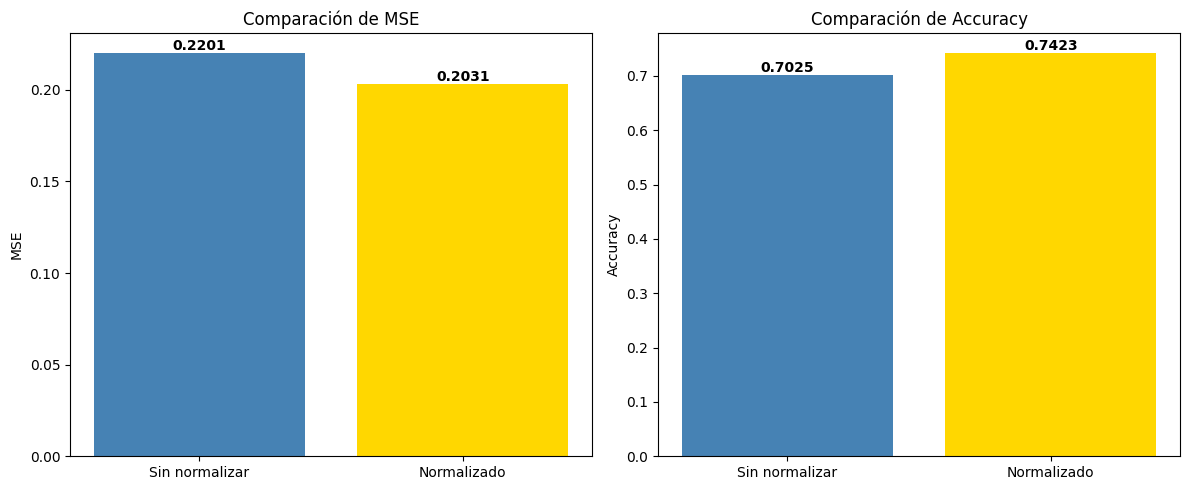

Mejora en MSE: 7.72%
Mejora en Accuracy: 5.67%


In [20]:
# Comparación de resultados con y sin normalización
non_norm_mse = 0.2201
non_norm_acc = 0.7025
norm_mse = 0.2031
norm_acc = 0.7423

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficamos la comparación de MSE
categories = ['Sin normalizar', 'Normalizado']
mse_values = [non_norm_mse, norm_mse]
colors = ['steelblue', 'gold']

ax1.bar(categories, mse_values, color=colors)
ax1.set_ylabel('MSE')
ax1.set_title('Comparación de MSE')
for i, v in enumerate(mse_values):
    ax1.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Graficamos la comparación de accuracy
acc_values = [non_norm_acc, norm_acc]

ax2.bar(categories, acc_values, color=colors)
ax2.set_ylabel('Accuracy')
ax2.set_title('Comparación de Accuracy')
for i, v in enumerate(acc_values):
    ax2.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Imprimir mejoras
mse_improvement = ((non_norm_mse - norm_mse) / non_norm_mse) * 100
acc_improvement = ((norm_acc - non_norm_acc) / non_norm_acc) * 100

print(f"Mejora en MSE: {mse_improvement:.2f}%")
print(f"Mejora en Accuracy: {acc_improvement:.2f}%")


## Ejercicio 5

In [22]:
valores_alpha = [1e-6, 5*1e-7, 1e-7, 5*1e-8, 1e-8]
alpha_mse_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    print(f"\nDescenso de gradiente para alpha = {alpha}")
    w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=alpha, num_it=10000)
    alpha_mse_lists.append(metrics['test_mse_list'])
    alpha_acc_lists.append(metrics['test_acc_list'])
    

plt.figure(figsize=(15, 6))

# Graficamos convergencia del MSE
plt.subplot(1, 2, 1)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_mse_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('Convergencia del MSE para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

# Graficamos convergencia de accuracy
plt.subplot(1, 2, 2)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_acc_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.title('Convergencia de la accuracy para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Descenso de gradiente para alpha = 1e-06
Iteración 0: Train MSE=0.2500, Acc=0.4885 | Test MSE=0.2499, Acc=0.5583
Iteración 100: Train MSE=0.2703, Acc=0.5123 | Test MSE=0.2904, Acc=0.4509
Iteración 200: Train MSE=0.4759, Acc=0.4877 | Test MSE=0.4207, Acc=0.5491
Iteración 300: Train MSE=0.4699, Acc=0.5123 | Test MSE=0.5295, Acc=0.4509
Iteración 400: Train MSE=0.2815, Acc=0.5123 | Test MSE=0.3089, Acc=0.4509


KeyboardInterrupt: 

In [2]:
# Valores de alpha a comparar
valores_alpha = [1e-6, 1e-5, 5e-5]
alpha_mse_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    print(f"\nDescenso de gradiente para alpha = {alpha}")
    w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=alpha, num_it=num_it)
    alpha_mse_lists.append(metrics['test_mse_list'])
    alpha_acc_lists.append(metrics['test_acc_list'])

# Graficar resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# MSE
plt.subplot(1, 2, 1)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_mse_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('MSE para tasas de aprendizaje')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_acc_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.title('Accuracy para tasas de aprendizaje')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Descenso de gradiente para alpha = 1e-06


NameError: name 'gradient_descent' is not defined

## Ejercicio 6


Tamaño: (32, 32)
Dataset guardado en processed_dataset_32.npz

--> Alpha: 4e-06
Iteración 0: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2502, Acc=0.4509
Iteración 100: Train MSE=0.2493, Acc=0.5123 | Test MSE=0.2506, Acc=0.4509
Iteración 200: Train MSE=0.2486, Acc=0.5123 | Test MSE=0.2501, Acc=0.4509
Iteración 300: Train MSE=0.2480, Acc=0.5130 | Test MSE=0.2496, Acc=0.4509
Iteración 400: Train MSE=0.2474, Acc=0.5260 | Test MSE=0.2491, Acc=0.4540
Iteración 500: Train MSE=0.2468, Acc=0.5521 | Test MSE=0.2486, Acc=0.4693
Iteración 600: Train MSE=0.2462, Acc=0.5674 | Test MSE=0.2481, Acc=0.4816
Iteración 700: Train MSE=0.2456, Acc=0.5888 | Test MSE=0.2475, Acc=0.4785
Iteración 800: Train MSE=0.2450, Acc=0.5965 | Test MSE=0.2471, Acc=0.5031
Iteración 900: Train MSE=0.2444, Acc=0.6110 | Test MSE=0.2466, Acc=0.5184
Iteración 1000: Train MSE=0.2438, Acc=0.6271 | Test MSE=0.2461, Acc=0.5307
Iteración 1100: Train MSE=0.2433, Acc=0.6371 | Test MSE=0.2456, Acc=0.5552
Iteración 1200: Train MSE=0.242

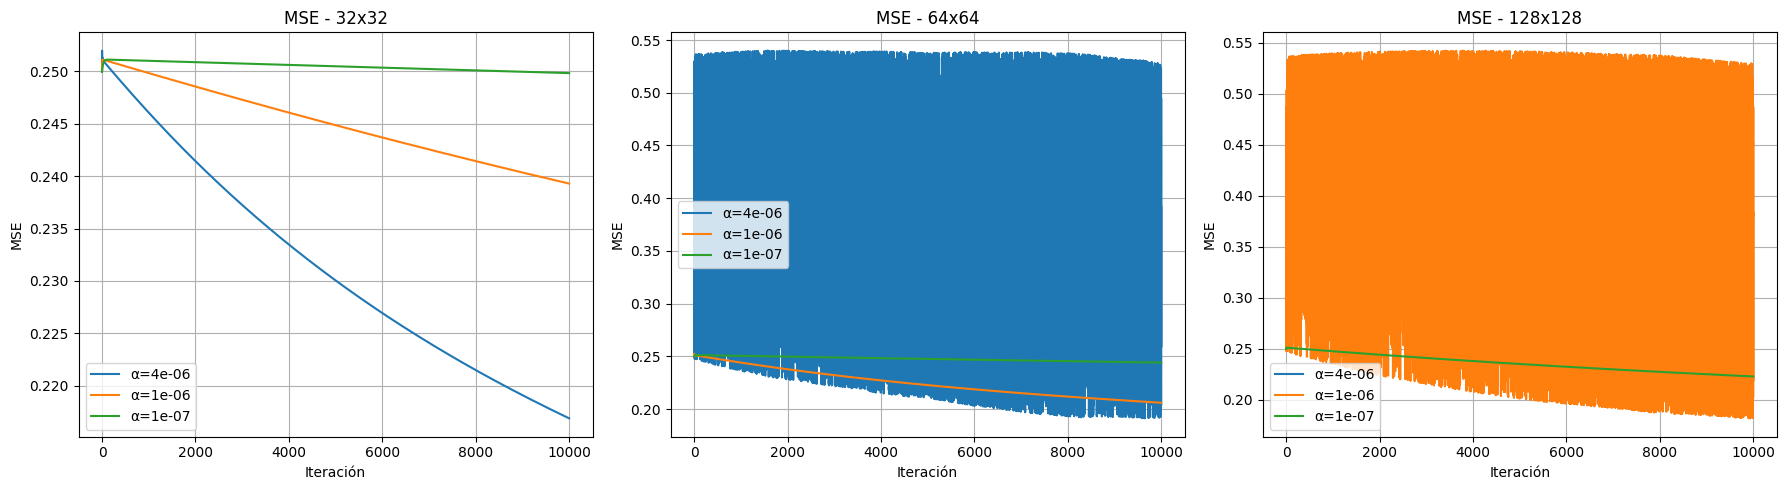

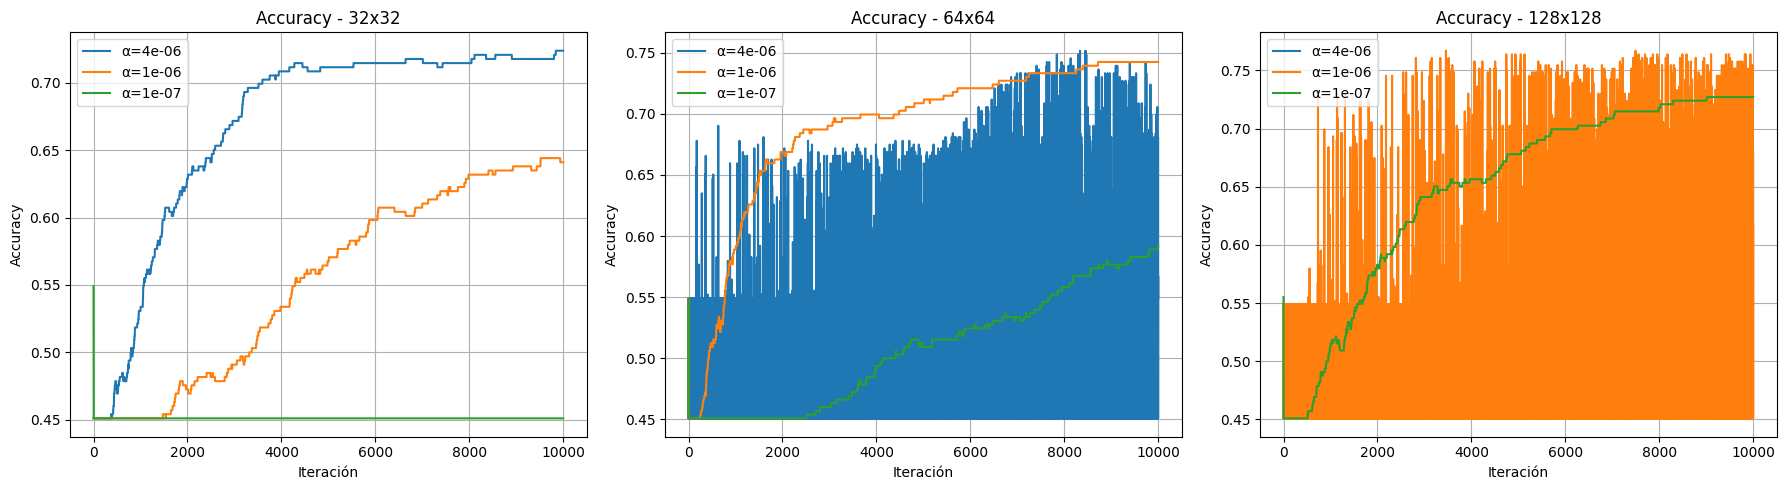

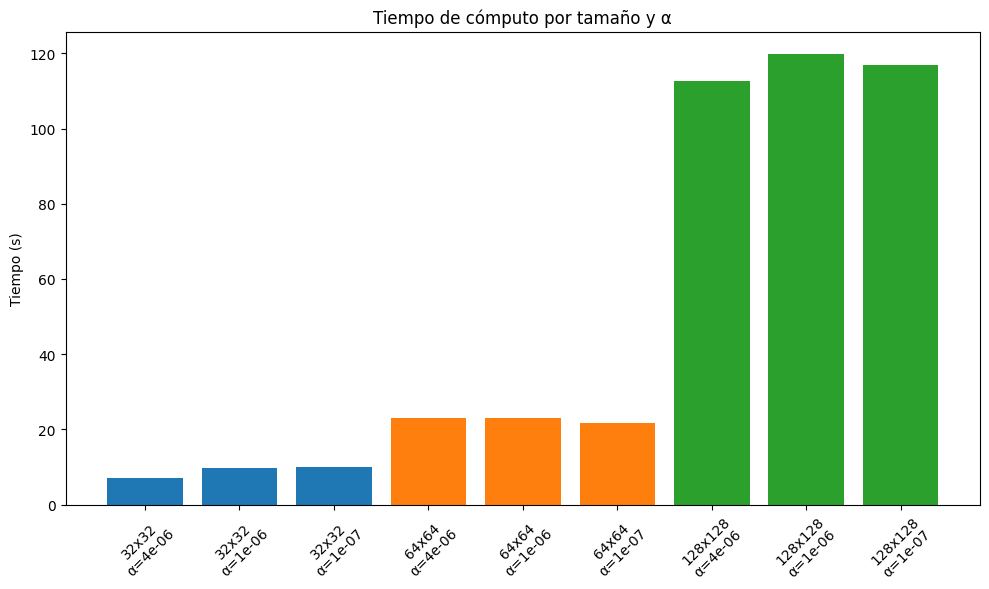

In [19]:
import time
import matplotlib.pyplot as plt
from pathlib import Path

# Resoluciones y alphas a probar
resolutions = [(32, 32), (64, 64), (128, 128)]
alphas_to_test = [4e-6, 1e-6, 1e-7]

# Para guardar resultados
results = []

for res in resolutions:
    print(f"\n=============================")
    print(f"Tamaño: {res}")
    print(f"=============================")

    healthy_dir = Path("DatasetTP/Healthy")
    parkinson_dir = Path("DatasetTP/Parkinson")

    processed_images = []
    labels = []

    for img_path in healthy_dir.glob("*.png"):
        img = process_image(img_path, target_size=res)
        if img is not None:
            processed_images.append(img)
            labels.append(0)

    for img_path in parkinson_dir.glob("*.png"):
        img = process_image(img_path, target_size=res)
        if img is not None:
            processed_images.append(img)
            labels.append(1)

    processed_images = np.array(processed_images)
    labels = np.array(labels)

    output_file = f"processed_dataset_{res[0]}.npz"
    save_processed_dataset(processed_images, labels, output_path=output_file)

    df = numpy_to_pandas_dataset(output_file)

    X = df.drop('label', axis=1).values
    y = df['label'].values

    # Split
    test_size = 0.2
    random_state = 42
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Normalizar
    X_train_norm = X_train / 255.0
    X_test_norm = X_test / 255.0

    for alpha in alphas_to_test:
        print(f"\n--> Alpha: {alpha}")

        start_time = time.time()
        w_final, b_final, metrics = gradient_descent(
            X_train_norm, y_train, X_test_norm, y_test,
            alpha=alpha, num_it=10000
        )
        end_time = time.time()
        elapsed_time = end_time - start_time

        final_acc = metrics['test_acc_list'][-1]
        final_mse = metrics['test_mse_list'][-1]

        # Guardar resultados
        results.append({
            'size': f"{res[0]}x{res[1]}",
            'alpha': alpha,
            'metrics': metrics,
            'time': elapsed_time,
            'final_acc': final_acc,
            'final_mse': final_mse
        })

        print(f"Accuracy final: {final_acc:.4f}")
        print(f"MSE final: {final_mse:.4f}")
        print(f"Tiempo: {elapsed_time:.2f}s")

# ================================
# Gráficos de MSE (3 subplots)
# ================================

plt.figure(figsize=(18, 5))
for i, res in enumerate(resolutions):
    plt.subplot(1, 3, i + 1)
    for alpha in alphas_to_test:
        # Filtrar resultados correspondientes
        m = next(item for item in results if item['size'] == f"{res[0]}x{res[1]}" and item['alpha'] == alpha)
        plt.plot(m['metrics']['test_mse_list'], label=f'α={alpha:.0e}')
    plt.xlabel('Iteración')
    plt.ylabel('MSE')
    plt.title(f"MSE - {res[0]}x{res[1]}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# ================================
# Gráficos de Accuracy (3 subplots)
# ================================

plt.figure(figsize=(18, 5))
for i, res in enumerate(resolutions):
    plt.subplot(1, 3, i + 1)
    for alpha in alphas_to_test:
        m = next(item for item in results if item['size'] == f"{res[0]}x{res[1]}" and item['alpha'] == alpha)
        plt.plot(m['metrics']['test_acc_list'], label=f'α={alpha:.0e}')
    plt.xlabel('Iteración')
    plt.ylabel('Accuracy')
    plt.title(f"Accuracy - {res[0]}x{res[1]}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# ================================
# Gráfico de barras de tiempo
# ================================

import pandas as pd

df_summary = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
for size in df_summary['size'].unique():
    subset = df_summary[df_summary['size'] == size]
    plt.bar([f"{size}\nα={a:.0e}" for a in subset['alpha']], subset['time'], label=size)

plt.ylabel('Tiempo (s)')
plt.title('Tiempo de cómputo por tamaño y α')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En esta seccion se estudió cómo influye el tamaño de escalado de las imágenes en la efectividad del método y en el tiempo de cómputo. Para analizarlo, se procesaron imágenes en tres tamaños distintos: 32×32, 64×64 y 128×128, y se probaron tres tasas de aprendizaje diferentes (α = 4e-6, 1e-6 y 1e-7) para observar el comportamiento detallado.

Los resultados mostraron que, para imágenes de 32×32, la tasa α = 4e-6 logró la mejor precisión, alrededor de 0.72, y además permitió que el MSE disminuyera rápidamente y de forma estable. Con α más pequeño, el MSE se mantuvo prácticamente constante y no se logró aprendizaje efectivo. En este caso, el tiempo de cómputo fue muy bajo, aproximadamente 7 segundos, lo que hace que este tamaño sea muy eficiente si se elige correctamente α.

Para imágenes de 64×64, la tasa α = 1e-6 mostró el mejor desempeño, alcanzando una precisión cercana a 0.75 y un descenso progresivo y estable del MSE. Con α demasiado grande (4e-6), tanto la precisión como el MSE mostraron fuertes oscilaciones, reflejando un aprendizaje inestable (tipo "serrucho") debido a los saltos grandes. Con α muy pequeño (1e-7), el método aprendía muy lentamente y el MSE apenas bajaba. En este caso, el tiempo de cómputo fue intermedio, alrededor de 17 segundos.

En imágenes de 128×128, solo α = 1e-7 permitió un aprendizaje estable, logrando una precisión final cercana a 0.74 y una reducción del MSE de forma progresiva. Con tasas mayores, el MSE presentó oscilaciones grandes y no se observó mejora real, indicando inestabilidad, como sucedia en las de 64x64, deebido a que esos alpha daban saltos demaciado grandes. El tiempo de cómputo en este tamaño fue el más alto, superando los 100 segundos.

Esto demuestra que aumentar el tamaño de las imágenes no implica automáticamente una mejora en la precisión ni en el MSE. De hecho, si no se elige un α adecuado, pueden presentarse oscilaciones severas en ambas métricas. Por ejemplo, un α muy grande en imágenes grandes genera curvas de MSE muy irregulares y de precisión inestable, mientras que un α muy pequeño produce curvas planas sin aprendizaje real.

Una observación clave es que, si se encuentra un α óptimo para cada tamaño, incluso imágenes pequeñas (32×32) podrían lograr una precisión y un MSE comparables o superiores a las de mayor tamaño, pero con un tiempo de cómputo mucho menor. Esto muestra que la clave no está solo en el tamaño de la imagen, sino en la combinación correcta entre tamaño y tasa de aprendizaje. Ajustar α correctamente permite aprovechar al máximo la información disponible, minimizar el error (MSE) y evitar tanto la falta de aprendizaje como el sobreajuste.

En conclusión, el tamaño de las imágenes y la tasa de aprendizaje están íntimamente relacionados y afectan directamente la efectividad y el tiempo de cómputo. En este estudio, el tamaño 64×64 mostró un buen balance general. Sin embargo, tamaños más pequeños pueden alcanzar resultados similares si se ajusta bien α, mientras que tamaños grandes requieren mucho más tiempo y un ajuste más fino para evitar inestabilidad. Este análisis demuestra la importancia de monitorear cuidadosamente tanto la precisión como el MSE y buscar el equilibrio adecuado para optimizar el rendimiento.

## Ejercicio 7

In [27]:
def confusion_matrix(y_true, y_pred):
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    return np.array([[TN, FP],
                     [FN, TP]])

In [29]:
alpha = 1e-6
w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha, 10000)

Iteración 0: Train MSE=0.2500, Acc=0.4885 | Test MSE=0.2499, Acc=0.5583
Iteración 100: Train MSE=0.2703, Acc=0.5123 | Test MSE=0.2904, Acc=0.4509
Iteración 200: Train MSE=0.4759, Acc=0.4877 | Test MSE=0.4207, Acc=0.5491
Iteración 300: Train MSE=0.4699, Acc=0.5123 | Test MSE=0.5295, Acc=0.4509
Iteración 400: Train MSE=0.2815, Acc=0.5123 | Test MSE=0.3089, Acc=0.4509
Iteración 500: Train MSE=0.4554, Acc=0.5123 | Test MSE=0.5137, Acc=0.4509
Iteración 600: Train MSE=0.3487, Acc=0.4877 | Test MSE=0.3144, Acc=0.5491
Iteración 700: Train MSE=0.2748, Acc=0.5123 | Test MSE=0.3027, Acc=0.4509
Iteración 800: Train MSE=0.2374, Acc=0.5299 | Test MSE=0.2481, Acc=0.4571
Iteración 900: Train MSE=0.4661, Acc=0.5123 | Test MSE=0.5257, Acc=0.4509
Iteración 1000: Train MSE=0.4695, Acc=0.4877 | Test MSE=0.4156, Acc=0.5491
Iteración 1100: Train MSE=0.4790, Acc=0.5123 | Test MSE=0.5398, Acc=0.4509
Iteración 1200: Train MSE=0.4877, Acc=0.4877 | Test MSE=0.4308, Acc=0.5491
Iteración 1300: Train MSE=0.3354, Acc

In [ ]:
y_pred_probs = predict(X_test_norm, w_final, b_final)

# Usamos un umbral para convertir los labels de y_pred a 0 y 1
y_pred = (y_pred_probs >= 0.5).astype(int)

cm = confusion_matrix(y_pred, y_test)
cm

array([[122,  27],
       [ 57, 120]])

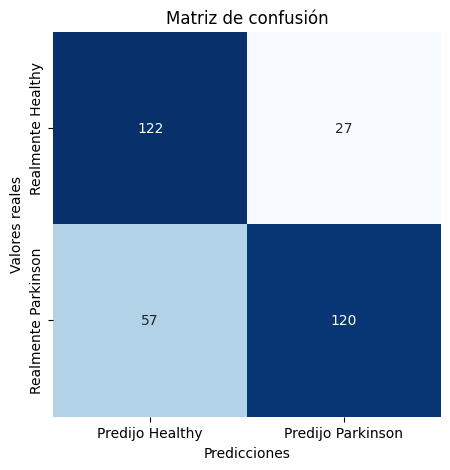

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predijo Healthy', 'Predijo Parkinson'],
            yticklabels=['Realmente Healthy', 'Realmente Parkinson'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

La matriz de confusión permite complementar las métricas globales (accuracy y MSE), aportando información más detallada sobre cómo se distribuyen los errores y reforzando el análisis de la efectividad del método.

A partir del α que mostró la mejor convergencia (α = 1e-6 para imágenes de 64×64), se generó la matriz de confusión para evaluar la calidad de las predicciones.

La matriz muestra que el método logra predecir correctamente 122 casos de Healthy y 120 casos de Parkinson, mientras que se observan 27 falsos positivos (Healthy predichos como Parkinson) y 57 falsos negativos (Parkinson predichos como Healthy).

En general, el método demuestra una buena capacidad de discriminación entre ambas clases, con una precisión total cercana al 75%. Sin embargo, se observa que hay más errores en los falsos negativos, lo cual indica que aún existe margen de mejora para evitar que casos de Parkinson sean clasificados como Healthy. Esto podría abordarse ajustando aún más la tasa de aprendizaje, trabajando con más datos o utilizando técnicas de regularización.



# Parte 2

## Ejercicio 2

In [52]:
w_final, b_final, metrics = gradient_ascent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-6, num_it=10000)

Iteración 0: Train LogLoss=0.6931 , Acc=0.5123| Test LogLoss=0.6934, Acc=0.4509
Iteración 100: Train LogLoss=0.6920 , Acc=0.5123| Test LogLoss=0.6947, Acc=0.4509
Iteración 200: Train LogLoss=0.6910 , Acc=0.5123| Test LogLoss=0.6939, Acc=0.4509
Iteración 300: Train LogLoss=0.6900 , Acc=0.5123| Test LogLoss=0.6932, Acc=0.4509
Iteración 400: Train LogLoss=0.6891 , Acc=0.5123| Test LogLoss=0.6924, Acc=0.4509
Iteración 500: Train LogLoss=0.6881 , Acc=0.5214| Test LogLoss=0.6916, Acc=0.4571
Iteración 600: Train LogLoss=0.6872 , Acc=0.5306| Test LogLoss=0.6908, Acc=0.4601
Iteración 700: Train LogLoss=0.6862 , Acc=0.5467| Test LogLoss=0.6901, Acc=0.4755
Iteración 800: Train LogLoss=0.6853 , Acc=0.5674| Test LogLoss=0.6893, Acc=0.4816
Iteración 900: Train LogLoss=0.6844 , Acc=0.5911| Test LogLoss=0.6885, Acc=0.4969
Iteración 1000: Train LogLoss=0.6834 , Acc=0.6057| Test LogLoss=0.6878, Acc=0.5276
Iteración 1100: Train LogLoss=0.6825 , Acc=0.6172| Test LogLoss=0.6870, Acc=0.5429
Iteración 1200: 

## Ejercicio 3

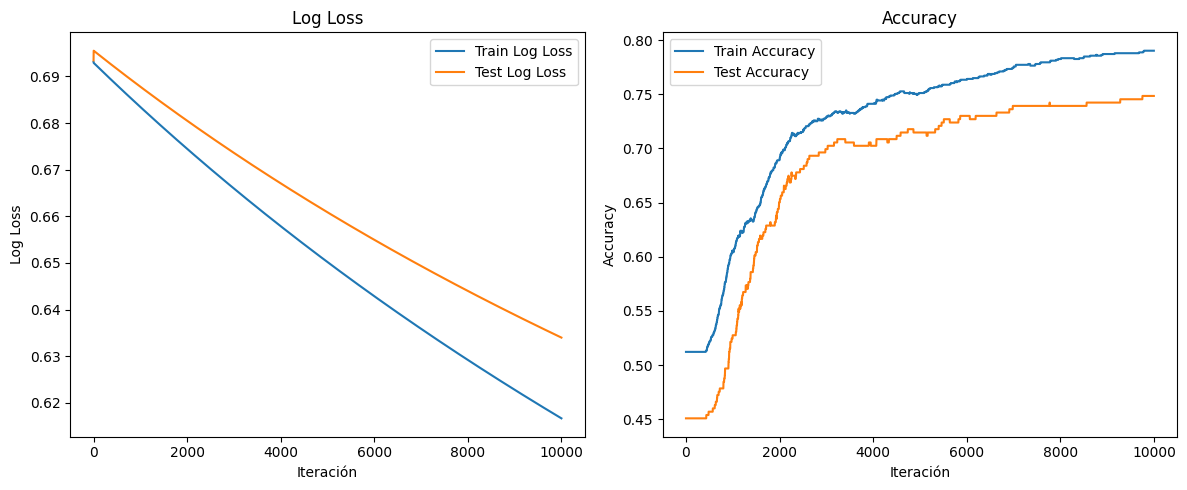

In [53]:
plot_metrics(metrics)

## Ejercicio 4


Ascenso de gradiente para alpha = 1e-06
Iteración 0: Train LogLoss=0.6931 , Acc=0.5123| Test LogLoss=0.6933, Acc=0.4509
Iteración 100: Train LogLoss=0.6919 , Acc=0.5123| Test LogLoss=0.6947, Acc=0.4509
Iteración 200: Train LogLoss=0.6910 , Acc=0.5123| Test LogLoss=0.6939, Acc=0.4509
Iteración 300: Train LogLoss=0.6900 , Acc=0.5123| Test LogLoss=0.6932, Acc=0.4509
Iteración 400: Train LogLoss=0.6890 , Acc=0.5123| Test LogLoss=0.6924, Acc=0.4509
Iteración 500: Train LogLoss=0.6881 , Acc=0.5222| Test LogLoss=0.6916, Acc=0.4571
Iteración 600: Train LogLoss=0.6871 , Acc=0.5306| Test LogLoss=0.6908, Acc=0.4601
Iteración 700: Train LogLoss=0.6862 , Acc=0.5505| Test LogLoss=0.6901, Acc=0.4724
Iteración 800: Train LogLoss=0.6853 , Acc=0.5674| Test LogLoss=0.6893, Acc=0.4785
Iteración 900: Train LogLoss=0.6843 , Acc=0.5911| Test LogLoss=0.6885, Acc=0.5000
Iteración 1000: Train LogLoss=0.6834 , Acc=0.6049| Test LogLoss=0.6878, Acc=0.5276
Iteración 1100: Train LogLoss=0.6825 , Acc=0.6164| Test Lo

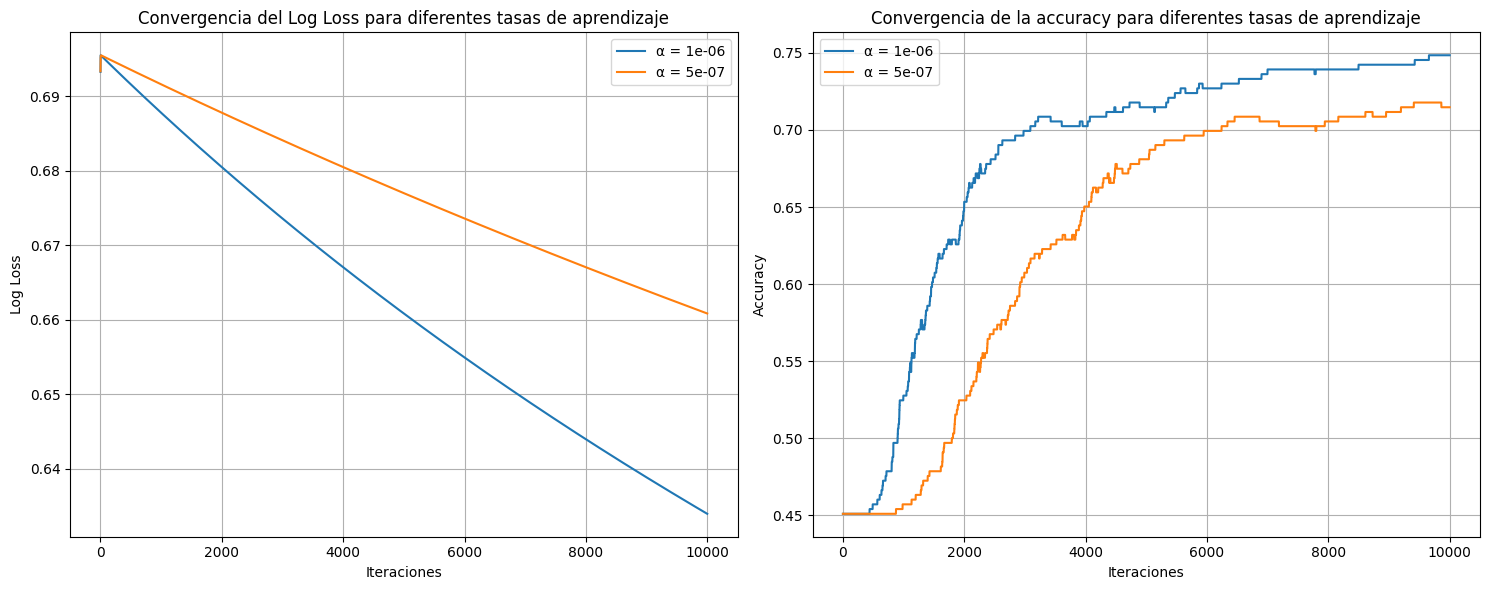

In [57]:
valores_alpha = [1e-6, 5e-7]
alpha_log_loss_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    print(f"\nAscenso de gradiente para alpha = {alpha}")
    w_final, b_final, metrics = gradient_ascent(X_train_norm, y_train, X_test_norm, y_test, alpha=alpha, num_it=10000)
    alpha_log_loss_lists.append(metrics['test_log_loss_list'])
    alpha_acc_lists.append(metrics['test_acc_list'])
    

plt.figure(figsize=(15, 6))

# Graficamos convergencia del Log Loss
plt.subplot(1, 2, 1)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_log_loss_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('Log Loss')
plt.title('Convergencia del Log Loss para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

# Graficamos convergencia de accuracy
plt.subplot(1, 2, 2)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_acc_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.title('Convergencia de la accuracy para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Ejercicio 5